# Classical Discrete Fourier Transform

The real parts are the cosine terms, the imaginary parts the sine terms.

The spectral power graph shows us the power in each frequency.

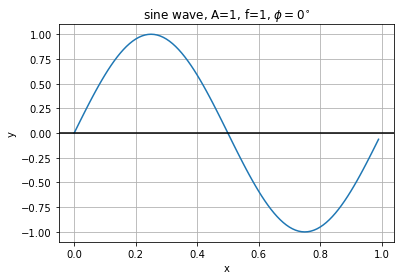

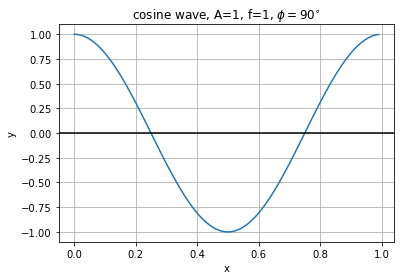

In [1]:
# Sine wave example
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plot

def plot_wave(A,f,phi,name='',color='g'):
    plot.clf()
    x = np.arange(0, 1, 0.01);
    y  = A*np.sin(2*np.pi*f*x + np.pi/180*phi)

    plot.plot(x,y)
    plot.xlabel('x')
    plot.ylabel('y')
    plot.title(name)
    plot.grid(True, which='both') 
    plot.axhline(y=0, color='k') 

    plot.show()

plot_wave(1,1,0,'sine wave, A=1, f=1, $\phi=0^{\circ}$')
plot_wave(1,1,90,'cosine wave, A=1, f=1, $\phi=90^{\circ}$')

In [2]:
sampling_rate = 100                          # the number of samples per second
time_interval=2                              # the amount of time to sample for
n_samples = int(sampling_rate*time_interval) # the number of total samples given the previous parameters

def wave(A,f,phi):
    """x will be an array sampling on the range 0 to T at every sampling_interval which is n_samples long
    y will be the value of a wave with Amplitude A, frequency f and phase phi along that interval sampled at each x"""

    sampling_interval = 1/sampling_rate     # the interval between samples
    x = np.arange(0, time_interval, sampling_interval);
    y  = A*np.sin(2*np.pi*f*x + np.pi/180*phi)

    return y


In [3]:
green_wave=wave(10,0.5,0)
blue_wave=wave(0.75,15,90)
red_wave=green_wave+blue_wave

from numpy import fft
fft_wave = fft.fft(red_wave)/n_samples # compute and normalize the FFT
frequencies_tried=np.arange(n_samples)/time_interval
amplitude=2*np.absolute(fft_wave)
half_range=range(int(n_samples/2))

for f,a in zip(frequencies_tried[half_range],amplitude[half_range]):
    if a>1e-6: # ignore those coefficients which are so small, so as to be numerical noise
        print("the amplitude at f=%.2f is A=%.2f"%(f,a))

the amplitude at f=0.50 is A=10.00
the amplitude at f=15.00 is A=0.75


# Quantum Fourier Transform

Quantum Fourier transform (QFT) is the quantum implementation of the <b>Discrete Fourier Transform (DFT)</b> of the amplitudes of a wavefunction. QFT appears in many quantum algorithms, e.g., Shor's factoring algorithm and quantum phase estimation. 

### Mathematical Treatment

#### 1. Discrete Fourier Transform (DFT)
DFT acts on a vector $(x_0,x_1, ...,x_j,... x_{N-1})$ and maps it to the vector $(y_0,y_1, ...,y_k,... y_{N-1})$ according to the following formula
$$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j\omega_N^{jk}$$
where $\omega_N^{jk} = e^{2\pi i \frac{jk}{N}}$.

#### 2. Quantum Fourier Transform (QFT)
To map QFT to DFT, we map, <br> 
vector $(x_0, ..., x_{N-1})$ -> quantum state $\vert x \rangle = \sum_{i=0}^{N-1} x_i \vert i \rangle$<br>
vector $(y_0, ..., y_{N-1})$ -> quantum state $\vert y \rangle = \sum_{i=0}^{N-1} y_i \vert i \rangle$

Hence, QFT acts on a quantum state $\vert x \rangle = \sum_{i=0}^{N-1} x_i \vert i \rangle$ and maps it to the quantum state $\vert y \rangle = \sum_{i=0}^{N-1} y_i \vert i \rangle$ according to the formula
$$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j\omega_N^{jk}$$
where $\omega_N^{jk} = e^{2\pi i \frac{jk}{N}}$.<br>
Note that only the amplitudes of the state were affected by this transformation.

This can also be expressed as the map:
$$\vert x \rangle \mapsto \frac{1}{\sqrt{N}}\sum_{y=0}^{N-1}\omega_N^{xy} \vert y \rangle$$

Or the unitary matrix:
$$ U_{QFT} = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} \sum_{y=0}^{N-1} \omega_N^{xy} \vert y \rangle \langle x \vert$$

The quantum Fourier transform (QFT) transforms states between two bases, the computational (Z) basis (usually {$\vert 0 \rangle, \vert 1 \rangle$}), and the Fourier basis (usually {$\vert + \rangle, \vert - \rangle$}). The H-gate is the single-qubit QFT. It transforms between the Z-basis states |0⟩ and |1⟩ to the X-basis states |+⟩ and |−⟩.

Similarly, all multi-qubit states in the computational basis have corresponding states in the Fourier basis. 
$$\vert \psi\mbox{ in Computational Basis} \rangle -> \vert \psi\mbox{ in Fourier Basis} \rangle$$
and
$$QFT\vert x \rangle=\vert \tilde{x} \rangle$$

(We designate states in the Fourier basis using the tilde (~))

### Example 1: 1-qubit QFT

On a single qubit, the general state vector is $\vert\psi\rangle = \alpha \vert 0 \rangle + \beta \vert 1 \rangle$.<br>
In this case, $x_0 = \alpha$, $x_1 = \beta$, and $N = 2$. Therefore,

$$y_0 = \frac{1}{\sqrt{2}}\left(    \alpha e^\left(2\pi i\frac{0\times0}{2}\right) + \beta e^\left(2\pi i\frac{1\times0}{2}\right)      \right) = \frac{1}{\sqrt{2}}\left(\alpha + \beta\right)$$

and

$$y_1 = \frac{1}{\sqrt{2}}\left(    \alpha e^\left(2\pi i\frac{0\times1}{2}\right) + \beta e^\left(2\pi i\frac{1\times1}{2}\right)      \right) = \frac{1}{\sqrt{2}}\left(\alpha - \beta\right)$$

Hence, post QFT, the final result is the state 

$$U_{QFT}\vert\psi\rangle = \frac{1}{\sqrt{2}}(\alpha + \beta) \vert 0 \rangle + \frac{1}{\sqrt{2}}(\alpha - \beta)  \vert 1 \rangle$$

This is essentially superposition states and the operation is exactly the result of applying the Hadamard operator ($H$) on the qubit:

$$H = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$$

When we apply the $H$ operator to the state $\vert\psi\rangle = \alpha \vert 0 \rangle + \beta \vert 1 \rangle$, we obtain the new state:

$$\frac{1}{\sqrt{2}}(\alpha + \beta) \vert 0 \rangle + \frac{1}{\sqrt{2}}(\alpha - \beta)  \vert 1 \rangle 
\equiv \tilde{\alpha}\vert 0 \rangle + \tilde{\beta}\vert 1 \rangle$$<br>
where,<br>
$\tilde{\alpha}=\frac{1}{\sqrt{2}}(\alpha + \beta)$ and <br>
$\tilde{\beta}= \frac{1}{\sqrt{2}}(\alpha - \beta)$<br>

Notice how the Hadamard gate performs the discrete Fourier transform for $N = 2$ on the amplitudes of the state. 

In [2]:
import math

# importing Qiskit
from qiskit import Aer, IBMQ
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute

from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector

In [5]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
#This function creates a state from which a QFT will return 001
def initial_state(circuit, q, n):
    """n-qubit input state for QFT that produces output 1."""
    for j in range(n):
        circuit.h(q[j])
        circuit.u1(math.pi/float(2**(j)), q[j]) #.inverse()

#The QFT function
def qft(circuit, q, n):
    """n-qubit QFT on q in circ."""
    for j in range(n):
        #First we apply a H gate on qubit
        circuit.h(q[j])
        for k in range(j+1,n):
            #we want to turn this state 
            #an extra quarter turn if the next qubit is in the state |1⟩,
            #another eighth turn if the next-to-next qubit is |1⟩ and so on
            circuit.cu1(math.pi/float(2**(k-j)), q[k], q[j])
        circuit.barrier()

#The QFT-Dagger or Inverse QFT function
def qft_inverse(circuit, q, n):
    for j in range(n):
        k = (n-1) - j
        for m in range(k):
            circuit.cu1(-math.pi/float(2**(k-m)), q[k], q[m])
        circuit.h(q[k])        
        circuit.barrier()


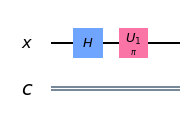

In [7]:
#We implement a QFT on a prepared 1-qubit input state that should return 1
q = QuantumRegister(1, 'x')
c = ClassicalRegister(1, 'c')
qc_qft = QuantumCircuit(q, c)

# first, prepare the state that should return 001 and draw that circuit
initial_state(qc_qft, q, 1)

#print(qc_qft.qasm())
qc_qft.draw(output='mpl')

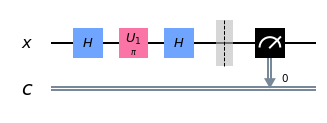

In [8]:
# next, do a qft on the prepared state and draw the entire circuit
qft(qc_qft, q, 1)
for i in range(1):
    qc_qft.measure(q[i], c[i])
    
qc_qft.draw(output='mpl')

In [9]:
# run on local simulator
backend = Aer.get_backend("qasm_simulator")

simulate = execute(qc_qft, backend=backend, shots=1024).result()
simulate.get_counts()

{'1': 1024}

### Multi-Qubit Quantum Fourier Transform (QFT)

For $N > 1$, the circuit will have the control-gates. <br>
For $N=2^n$, $QFT_N$ acting on the state $\vert x \rangle = \vert x_1\ldots x_n \rangle$ where $x_1$ is the most significant bit.

\begin{aligned}
QFT_N\vert x \rangle & = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1}\omega_N^{xy} \vert y \rangle 
\\
& = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{2 \pi i xy / 2^n} \vert y \rangle ~\text{since}\: \omega_N^{xy} = e^{2\pi i \frac{xy}{N}} \:\text{and}\: N = 2^n 
\\
& = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} e^{2 \pi i \left(\sum_{k=1}^n y_k/2^k\right) x} \vert y_1 \ldots y_n \rangle \:\text{rewriting in fractional binary notation}\: y = y_1\ldots y_n, y/2^n = \sum_{k=1}^n y_k/2^k 
\\
& = \frac{1}{\sqrt{N}} \sum_{y=0}^{N-1} \prod_{k=1}^n e^{2 \pi i x y_k/2^k } \vert y_1 \ldots y_n \rangle \:\text{after expanding the exponential of a sum to a product of exponentials} 
\\
\end{aligned}

Now, each $y_i \in \{0, 1\}$. If $y_i =0$, then $e^{2πiy_i(.x_0x_1...x_j )} = e^0 = 1$. If $y_i =1$, then the terms are left with $e^{2πi(.x_0x_1...x_j )}$. <br>
Hence $QFT_N$ becomes,

$$
QFT_N\vert x \rangle = \frac{1}{\sqrt{N}} \bigotimes_{k=1}^n  \left(\vert0\rangle + e^{2 \pi i x /2^k } \vert1\rangle \right) \:\text{after rearranging the sum and products, and expanding} 
\sum_{y=0}^{N-1} = \sum_{y_1=0}^{1}\sum_{y_2=0}^{1}\ldots\sum_{y_n=0}^{1} 
\\
= \frac{1}{\sqrt{N}}
\left(\vert0\rangle + e^{\frac{2\pi i}{2}x} \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^2}x} \vert1\rangle\right) 
\otimes  
\ldots
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^{n-1}}x} \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^n}x} \vert1\rangle\right) 
$$

Notice that two things are going on <br>
1. superposition of states - Hadamard gate introduces superposition and
2. the introduction of phases - the discrete phase gate $R_k$ introduces phase. It is given as
$$
R_k = 
\left[\begin{matrix}
1&0\\
0&e^\left(\frac{2\pi i}{2^k}\right)\\
\end{matrix}\right]
$$ so that, 
$R_k \vert 0 \rangle = \vert 0 \rangle$ and $R_k \vert 1 \rangle = e^{(2\pi i/2^k)}\vert 1 \rangle$

### The circuit for QFT

The circuit that implements QFT makes use of two gates,<br>
1. a single-qubit Hadamard gate, $H$, action of $H$ on the single-qubit state $\vert x_k\rangle$ is

$$H\vert x_k \rangle = \vert0\rangle + e^\left(\frac{2\pi i}{2}x_k\right)\vert1\rangle$$

2. a two-qubit controlled rotation $CROT_k$ given in block-diagonal form as 

$$CROT_k = \left[\begin{matrix}
I&0\\
0&UROT_k\\
\end{matrix}\right]$$
where 
$$UROT_k = \left[\begin{matrix}
1&0\\
0&e^\left(\frac{2\pi i}{2^k}\right)\\
\end{matrix}\right]$$

The action of $CROT_k$ on the two-qubit state $\vert x_jx_k\rangle$ where the first qubit is the control and the second is the target is given by

$$CROT_0\vert x_j0\rangle = \vert x_j0\rangle$$
i.e.,
$$CROT_0\vert 00\rangle = \vert 00\rangle$$
$$CROT_0\vert 10\rangle = \vert 10\rangle$$

and
$$CROT_1\vert x_j1\rangle = e^\left( \frac{2\pi i}{2^k}x_j \right)\vert x_j1\rangle$$
i.e.,
$$CROT_1\vert 01\rangle = e^\left( \frac{2\pi i}{2^k}x_j \right)\vert 01\rangle = \vert 01\rangle$$
$$CROT_1\vert 01\rangle = e^\left( \frac{2\pi i}{2^k}x_j \right)\vert 01\rangle = e^\left( \frac{2\pi i}{2^1}1 \right)\vert 01\rangle = e^{pi i}\vert 01\rangle = -1\vert 01\rangle$$


With these two gates, a circuit that implements an n-qubit QFT looks like,

<img src="images/qft.png">

The circuit operates as follows. We start with an n-qubit input state $\vert x_1x_2\ldots x_n\rangle$.

<ol>
<li> After the first Hadamard gate on qubit 1, the state is transformed from the input state to 

$$
H_1\vert x_1x_2\ldots x_n\rangle = 
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + \exp\left(\frac{2\pi i}{2}x_1\right)\vert1\rangle\right]
\otimes
\vert x_2x_3\ldots x_n\rangle
$$

<li> After the $CROT_2$ gate on qubit 1 controlled by qubit 2, the state is transformed to

$$
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + \exp\left(\frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1\right)\vert1\rangle\right]
\otimes
\vert x_2x_3\ldots x_n\rangle
$$

<li> After the application of the last $CROT_n$ gate on qubit 1 controlled by qubit $n$, the state becomes

$$
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^n}x_n + 
\frac{2\pi i}{2^{n-1}}x_{n-1} + 
\ldots + 
\frac{2\pi i}{2^2}x_2 + 
\frac{2\pi i}{2}x_1
\right)
\vert1\rangle\right]
\otimes
\vert x_2x_3\ldots x_n\rangle
$$

Noting that 

$$
x = 2^{n-1}x_1 + 2^{n-2}x_2 + \ldots + 2^1x_{n-1} + 2^0x_n
$$

we can write the above state as 

$$
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^n}x 
\right)
\vert1\rangle\right]
\otimes
\vert x_2x_3\ldots x_n\rangle
$$

<li> After the application of a similar sequence of gates for qubits $2\ldots n$, we find the final state to be

$$
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^n}x 
\right)
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^{n-1}}x 
\right)
\vert1\rangle\right]
\otimes
\ldots
\otimes
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^{2}}x 
\right)
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^{1}}x 
\right)
\vert1\rangle\right]
$$
which is exactly the QFT of the input state as derived <a href="#qfteqn">above</a> with the caveat that the order of the qubits is reversed in the output state.
</ol>

## Example 2: 3-qubit QFT <a id='example2'></a>

The steps to creating the circuit for $\vert y_1y_2y_3\rangle = QFT_8\vert x_1x_2x_3\rangle$ would be:

<ol>
<li> Apply a Hadamard gate to $\vert x_3 \rangle$

$$
\psi_1 = 
\vert x_1\rangle
\otimes
\vert x_2\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(\frac{2\pi i}{2}x_3\right) 
\vert1\rangle\right]
$$

<li> Apply a $CROT_2$ gate to $\vert x_3\rangle$ depending on $\vert x_2\rangle$

$$
\psi_2 = 
\vert x_1\rangle
\otimes
\vert x_2\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_3
\right) 
\vert1\rangle\right]
$$

<li> Apply a $CROT_3$ gate to $\vert x_3\rangle$ depending on $\vert x_1\rangle$

$$
\psi_3 = 
\vert x_1\rangle
\otimes
\vert x_2\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^3}x_1 + \frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_3
\right) 
\vert1\rangle\right]
$$

<li> Apply a Hadamard gate to $\vert x_2 \rangle$

$$
\psi_4 = 
\vert x_1\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2}x_2
\right) 
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^3}x_1 + \frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_3
\right) 
\vert1\rangle\right]
$$

<li> Apply a $CROT_2$ gate to $\vert x_2\rangle$ depending on $\vert x_1\rangle$

$$
\psi_5 = 
\vert x_1\rangle
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^2}x_1 + \frac{2\pi i}{2}x_2
\right) 
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^3}x_1 + \frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_3
\right) 
\vert1\rangle\right]
$$

<li> Apply a Hadamard gate to $\vert x_1\rangle$

$$
\psi_6 = 
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2}x_1
\right) 
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^2}x_1 + \frac{2\pi i}{2}x_2
\right) 
\vert1\rangle\right]
\otimes
\frac{1}{\sqrt{2}}
\left[
\vert0\rangle + 
\exp\left(
\frac{2\pi i}{2^3}x_1 + \frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_3
\right) 
\vert1\rangle\right]
$$

<li> Keep in mind the reverse order of the output state relative to the desired QFT. Therefore, measure the bits in reverse order, that is $y_3 = x_1, y_2 = x_2, y_1 = y_3$.

## A note about the form of the QFT

The example above demonstrates a very useful form of the QFT for $N=2^n$. Note that only the last qubit depends on the values of all the other input qubits and each further bit depends less and less on the input qubits. This becomes important in physical implementations of the QFT, where nearest-neighbor couplings are easier to achieve than distant couplings between qubits.

## Qiskit Implementation<a id='implementation'></a>

In Qiskit, the implementation of the $CROT$ gate used in the discussion above is a controlled phase rotation gate. This gate is defined in [OpenQASM](https://github.com/QISKit/openqasm) as

$$
CU_1(\theta) =
\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & e^{i\theta}\end{bmatrix}
$$

Hence, the mapping from the $CROT_k$ gate in the discussion above into the $CU_1$ gate is found from the equation

$$
\theta = 2\pi/2^k = \pi/2^{k-1}
$$

We will now implement the three-qubit QFT as discussed above. We first create a state whose QFT is known. The output after a QFT is applied to this special state is $\vert001\rangle$.

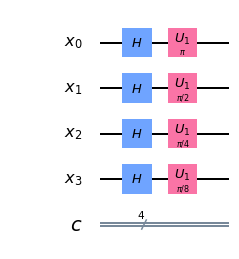

In [10]:
#Let's now implement a QFT on a prepared three qubit input state that should return $001$:
q = QuantumRegister(4, 'x')
c = ClassicalRegister(4, 'c')
qc_qft3 = QuantumCircuit(q, c)

# first, prepare the state that should return 001 and draw that circuit
initial_state(qc_qft3, q, 4)

qc_qft3.draw(output='mpl')

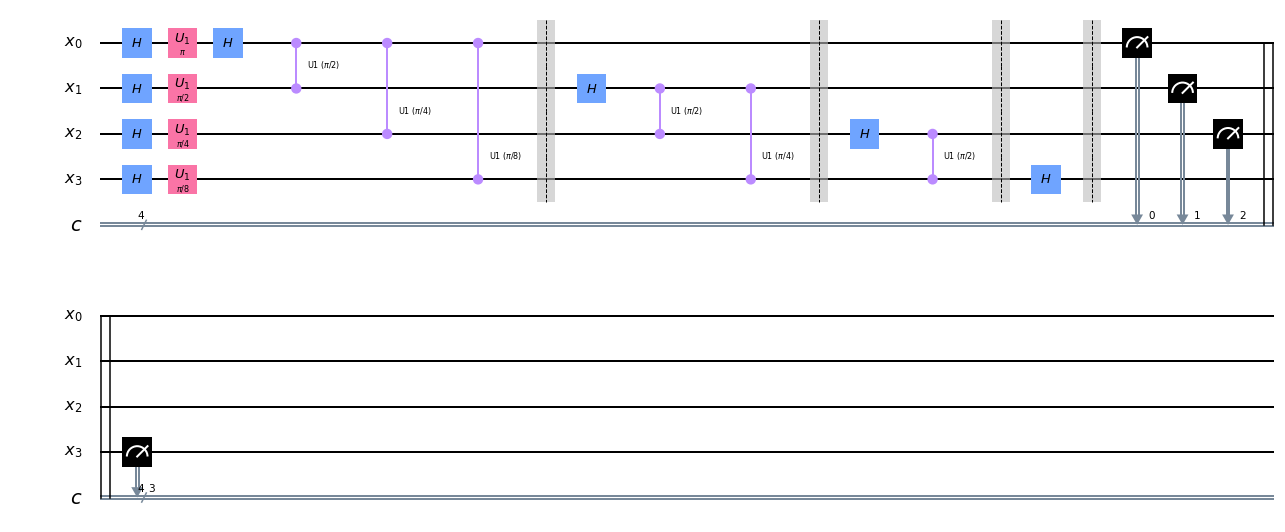

In [11]:
# next, do a qft on the prepared state and draw the entire circuit
qft(qc_qft3, q, 4)
for i in range(4):
    qc_qft3.measure(q[i], c[i])
    
qc_qft3.draw(output='mpl')

## Experiment with Simulators

In [12]:
# run on local simulator
backend = Aer.get_backend("qasm_simulator")

simulate = execute(qc_qft3, backend=backend, shots=1024).result()
simulate.get_counts()

{'1111': 1024}

We indeed see that the outcome is always $001$ when we execute the code on the simulator.


## Experiment with Real Devices
We then see how the same circuit can be executed on real-device backends.

In [13]:
#Now let us run the job in a real QC
#IBMQ provider lets one run the circuit on real devices or on our HPC simulator. 
from qiskit import IBMQ

#To access IBMQ devices, we need an API token. 
#Unless your registration information has changed, we only need to do this once. 
MY_API_TOKEN='572f057faf2d93153592814e772f301325b332b27dac1fd311d516ba595d2f133d955a29eccb281cb08ae6204eea37bc7117d6d7d80a921f92ad6d1c709c1260'
IBMQ.stored_account()

#Choose a backend - QC 
from qiskit.providers.ibmq import least_busy
provider = IBMQ.load_account()
backend = least_busy(provider.backends(simulator=False))
print("The best backend is " + backend.name())
shots = 2048
job_exp = execute(qc_qft3, backend=backend, shots=shots)
job_monitor(job_exp)

ibmqfactory.load_account:WARNING:2020-05-13 16:45:42,576: Credentials are already in use. The existing account in the session will be replaced.


The best backend is ibmqx2
Job Status: job has successfully run


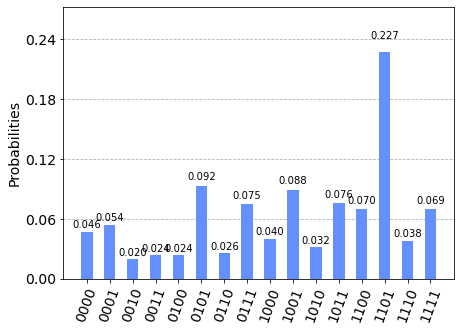

In [14]:
results = job_exp.result()
plot_histogram(results.get_counts())

We see that the highest probability outcome $001$ when we execute the code on a real device.

What if we have a bit pattern 101 on a 3-qubit system and we apply the QFT on all the three qubits. To implement 101, we use $X$ gates..

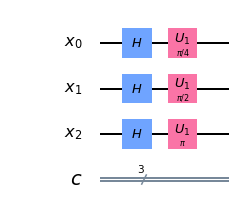

In [50]:
def generator(k):
    return (np.pi*2)/(2**k)

#Let's now implement a QFT on a prepared three qubit input state that should return $001$:
q = QuantumRegister(3, 'x')
c = ClassicalRegister(3, 'c')
qc_qft3 = QuantumCircuit(q, c)

# deterministic pattern
#qc_qft3.x(q[0])
#qc_qft3.x(q[1])
#qc_qft3.x(q[2])

# probabilistic pattern
qc_qft3.h(q[0])
qc_qft3.h(q[1])
qc_qft3.h(q[2])

# Add rotations
qc_qft3.u1(generator(3), q[0])
qc_qft3.u1(generator(2), q[1])
qc_qft3.u1(generator(1), q[2])


qc_qft3.draw(output='mpl')

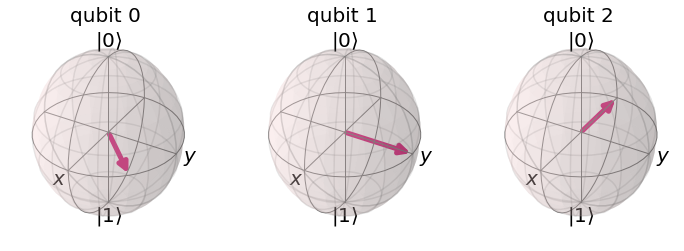

In [51]:
#How the state vector looks like
backend = Aer.get_backend("statevector_simulator")
orig_statevector = execute(qc_qft3, backend=backend).result().get_statevector()
plot_bloch_multivector(orig_statevector)

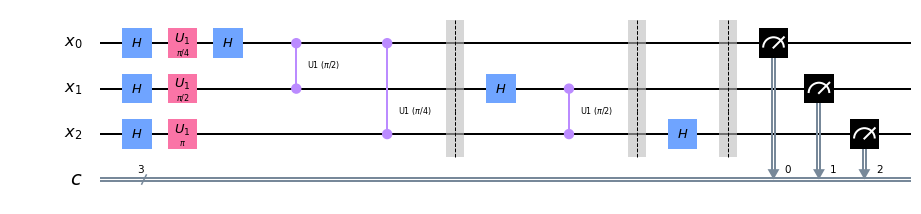

In [52]:
#Now we apply the QFT circuit
# next, do a qft on the prepared state and draw the entire circuit
qft(qc_qft3, q, 3)
for i in range(3):
    qc_qft3.measure(q[i], c[i])
    
qc_qft3.draw(output='mpl')

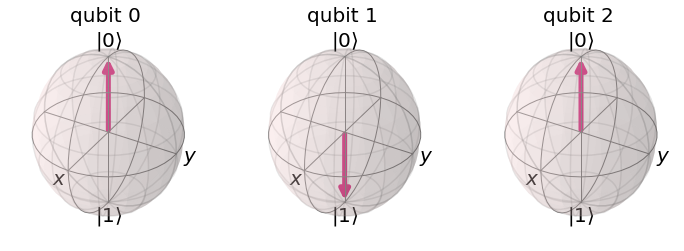

In [53]:
#How the state vector looks like
backend = Aer.get_backend("statevector_simulator")
qft_statevector = execute(qc_qft3, backend=backend).result().get_statevector()
plot_bloch_multivector(qft_statevector)

{'100': 462, '110': 205, '111': 22, '011': 124, '010': 211}


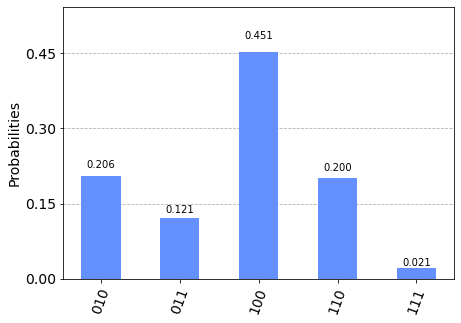

In [54]:
# run on local simulator
backend = Aer.get_backend("qasm_simulator")

simulate = execute(qc_qft3, backend=backend, shots=1024).result()
print(simulate.get_counts())
plot_histogram(simulate.get_counts())

15
[(<qiskit.circuit.barrier.Barrier object at 0x000002B3A9AFBD00>, [Qubit(QuantumRegister(3, 'x'), 0), Qubit(QuantumRegister(3, 'x'), 1), Qubit(QuantumRegister(3, 'x'), 2)], []), (<qiskit.circuit.measure.Measure object at 0x000002B3A9731A90>, [Qubit(QuantumRegister(3, 'x'), 0)], [Clbit(ClassicalRegister(3, 'c'), 0)]), (<qiskit.circuit.measure.Measure object at 0x000002B3A9731910>, [Qubit(QuantumRegister(3, 'x'), 1)], [Clbit(ClassicalRegister(3, 'c'), 1)]), (<qiskit.circuit.measure.Measure object at 0x000002B3A9B9DBB0>, [Qubit(QuantumRegister(3, 'x'), 2)], [Clbit(ClassicalRegister(3, 'c'), 2)])]
[(<qiskit.circuit.library.standard_gates.h.HGate object at 0x000002B3A9C59760>, [Qubit(QuantumRegister(3, 'x'), 0)], []), (<qiskit.circuit.library.standard_gates.h.HGate object at 0x000002B3A8564D00>, [Qubit(QuantumRegister(3, 'x'), 1)], []), (<qiskit.circuit.library.standard_gates.h.HGate object at 0x000002B3A96CFA00>, [Qubit(QuantumRegister(3, 'x'), 2)], []), (<qiskit.circuit.library.standard

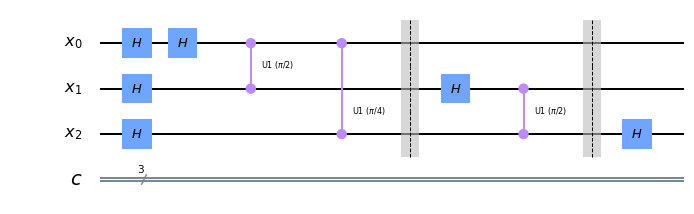

In [50]:
#Now, we operate the data of the circuit, to remove the measurement gates
print(len(qc_qft3.data))
print(qc_qft3.data[11:])
qc_qft3.data = qc_qft3.data[0:11]
print(qc_qft3.data)
qc_qft3.draw('mpl')

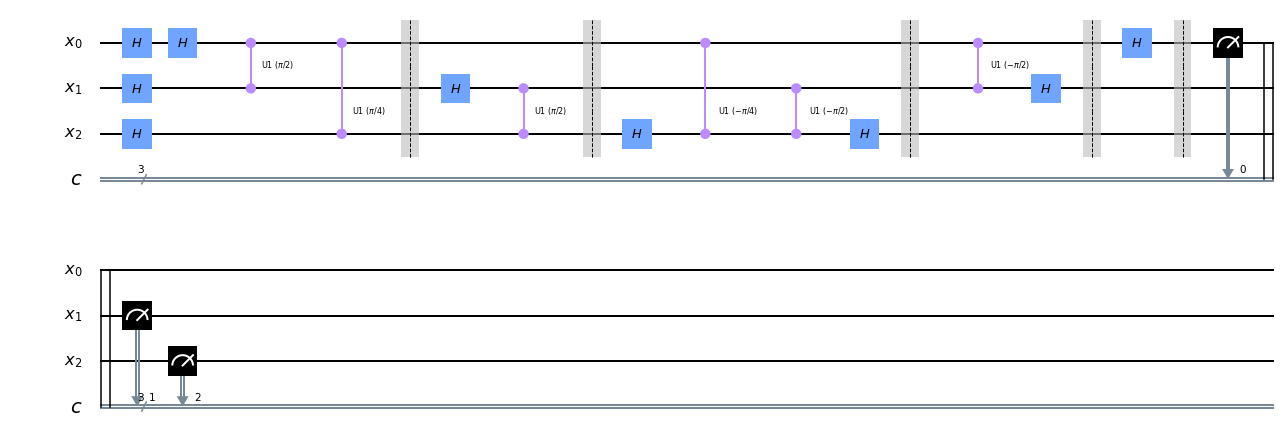

In [51]:
#Now let us add a reverse Fourier Transform
qft_inverse(qc_qft3, q, 3)
for i in range(3):
    qc_qft3.measure(q[i], c[i])
    
#print(qc_qft3.qasm())
qc_qft3.draw(output='mpl')

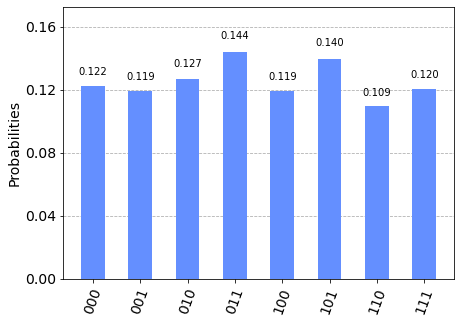

In [53]:
# run on local simulator
backend = Aer.get_backend("qasm_simulator")

simulate = execute(qc_qft3, backend=backend, shots=1024).result()
simulate.get_counts()
plot_histogram(simulate.get_counts())

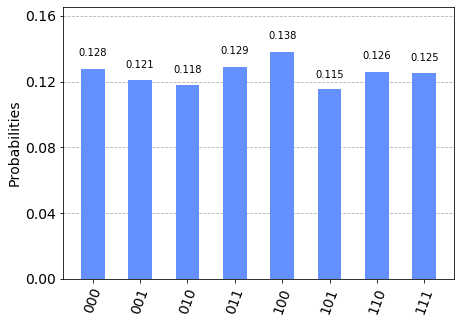

In [81]:
# An Experiment - using H gates in parallel
q = QuantumRegister(3, 'x')
c = ClassicalRegister(3, 'c')
qftt = QuantumCircuit(q, c)

# we prepare the input state 101
qftt.x(q[0])
qftt.x(q[2])

qftt.h(q[0])
qftt.h(q[1])
qftt.h(q[2])


#qftt.h(q[0])
#qftt.h(q[1])
#qftt.h(q[2])

for i in range(3):
    qftt.measure(q[i], c[i])
# run on local simulator
backend = Aer.get_backend("qasm_simulator")

simulate = execute(qftt, backend=backend, shots=1024).result()
simulate.get_counts()
plot_histogram(simulate.get_counts())

[0, 0, 0, 0, 0, 0, 0, 1]


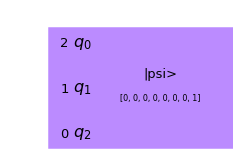

In [16]:
from qiskit.aqua.circuits import FourierTransformCircuits as QFT
import math

#I have a state psi as an ndarray of shape (2^3)
psi = [0,0,0,0,0,0,0,1] #amplitudes, for 000 and 001
print(psi)

circuit = QuantumCircuit(3)
circuit.initialize( psi, [i for i in reversed(circuit.qubits)])
circuit.draw('mpl')

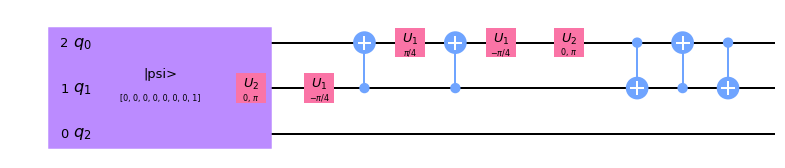

In [17]:
QFT.construct_circuit(circuit=circuit, qubits=circuit.qubits[:2], inverse=True)
circuit.draw('mpl')

In [22]:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(circuit, backend, shots=1).result().get_statevector()

In [23]:
print(final_state)

[ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  5.00000000e-01-1.66533454e-16j  1.11022302e-16+5.00000000e-01j
 -5.00000000e-01+1.66533454e-16j -1.11022302e-16-5.00000000e-01j]


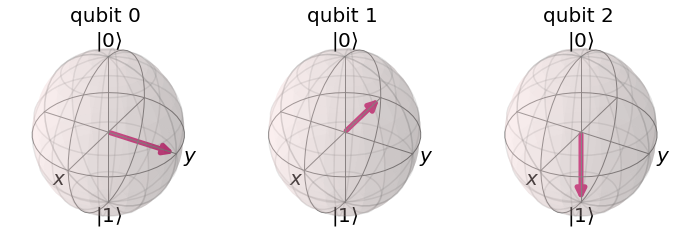

In [23]:
plot_bloch_multivector(final_state)

Value:  12  qubits:  [0, 1, 2, 3]
1100
Value:  21  qubits:  [4, 5, 6, 7, 8]
10101


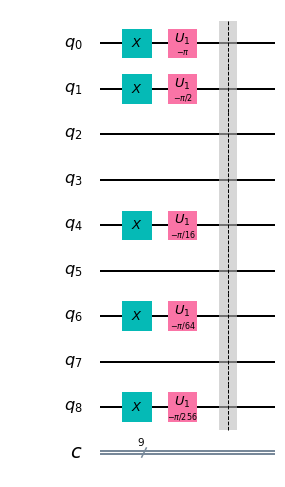

In [36]:
#Quantum Fourier Transform examples.
import math
from qiskit import QuantumCircuit
from qiskit import execute, BasicAer

def num_qubit_required(int_value):
    bit_value = "{0:b}".format(int_value)
    return len(bit_value)

def get_qubits_array(num_qubits, start_qbit_n):
    qubits = [0]*num_qubits
    qbit_n=start_qbit_n
    for i in range(num_qubits):
        qubits[i]=qbit_n
        qbit_n=qbit_n+1
    return(qubits)
    

def input_state(circ, int_value, qubits):
    """n-qubit input state for QFT that produces output 1."""
    bit_value = "{0:b}".format(int_value)
    print(bit_value)
    qbit_n=0
    for j in bit_value:
        if j=='1':
            circ.x(qubits[qbit_n])
            circ.u1(-math.pi/float(2**(qubits[qbit_n])), qubits[qbit_n])
        qbit_n=qbit_n+1
    
def qft(circ, n):
    """n-qubit QFT on q in circ."""
    for j in range(n):
        for k in range(j):
            circ.cu1(math.pi/float(2**(j-k)), j, k)
        circ.h(j)

qft3 = QuantumCircuit(9, 9, name="qft3")
qft4 = QuantumCircuit(9, 8, name="qft4")
qft5 = QuantumCircuit(9, 8, name="qft5")

#Feature 1
value=12
num_qubits = num_qubit_required(value)
qubits = get_qubits_array(num_qubits,0)
print('Value: ',value,' qubits: ',qubits)
input_state(qft3, value ,qubits)

#Feature 2
value=21
num_qubits = num_qubit_required(value)
qubits = get_qubits_array(num_qubits,4)
print('Value: ',value,' qubits: ',qubits)
input_state(qft3, value,qubits)

qft3.barrier()
qft3.draw('mpl')

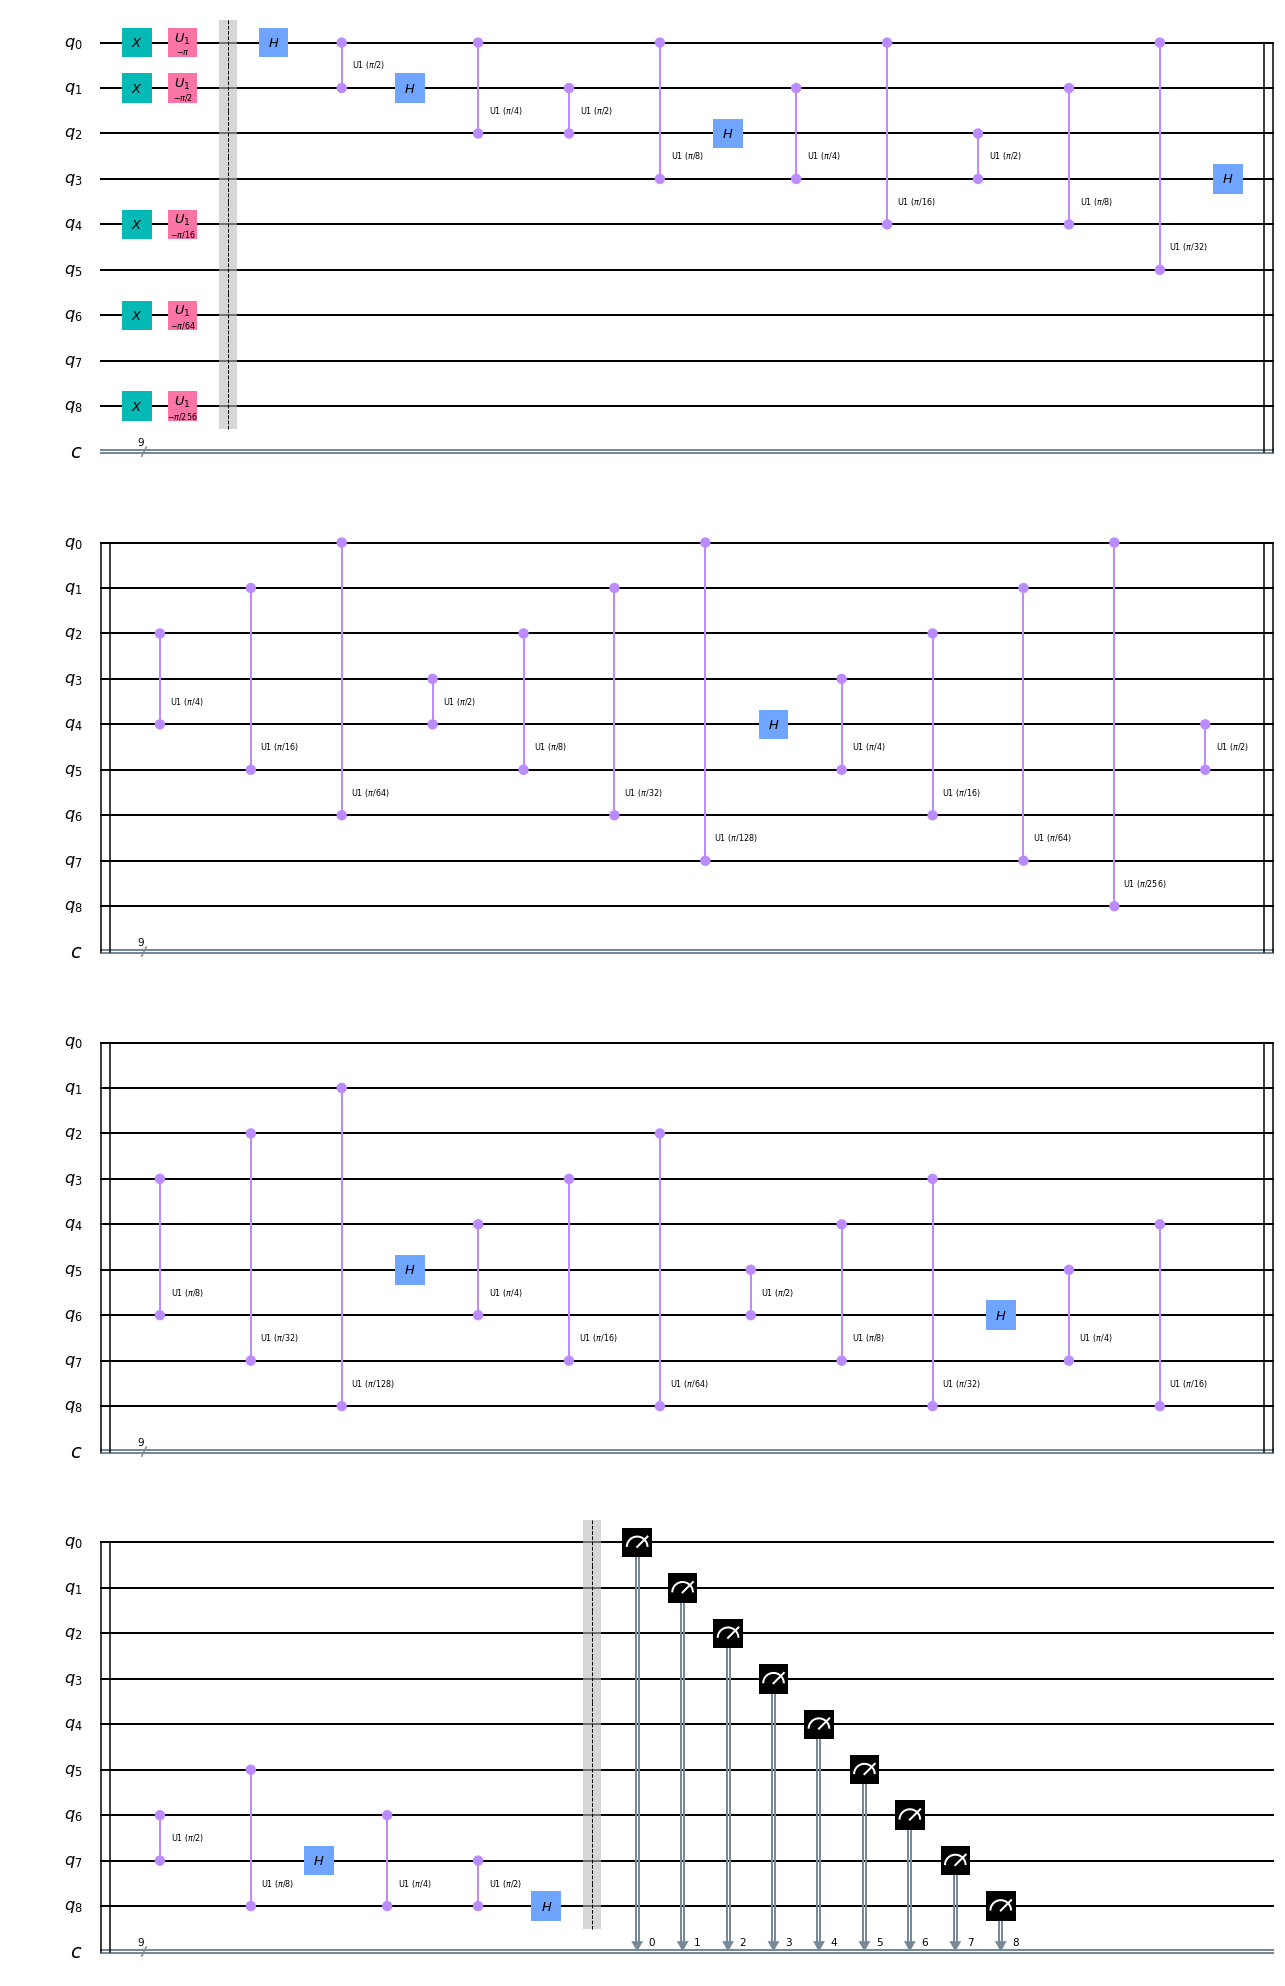

In [37]:
qft(qft3, 9)
qft3.barrier()
for j in range(9):
    qft3.measure(j, j)
qft3.draw('mpl')

In [23]:
sim_backend = BasicAer.get_backend('qasm_simulator')
job = execute([qft3, qft4, qft5], sim_backend, shots=1024)
result = job.result()
print(result.get_counts(qft3))
print(result.get_counts(qft4))
print(result.get_counts(qft5))

No measurements in circuit "qft4", classical register will remain all zeros.
No measurements in circuit "qft5", classical register will remain all zeros.


{'101011110': 1, '111111100': 4, '100010111': 1, '101010100': 2, '111001010': 1, '101010101': 1, '100001000': 1, '001110001': 1, '110001010': 1, '011000000': 3, '001101101': 1, '101010000': 5, '011100110': 2, '000110011': 2, '010110100': 2, '111110010': 2, '110100111': 2, '011000001': 1, '000010000': 2, '111111111': 1, '110110000': 3, '110111010': 2, '101000001': 1, '000111010': 2, '101110101': 2, '000000000': 1, '101011111': 1, '100000001': 1, '001101010': 1, '111010101': 1, '101101000': 3, '001111110': 1, '011010100': 2, '000110000': 2, '001010001': 2, '101111110': 5, '110010010': 3, '110011000': 1, '000011111': 2, '011011000': 2, '100000101': 1, '101110010': 3, '110100110': 2, '010001011': 1, '001101111': 2, '001100010': 3, '101011101': 3, '101001011': 2, '111101010': 4, '011100001': 3, '000010110': 3, '101010111': 3, '111110110': 1, '011111000': 1, '010010111': 4, '011000010': 2, '110010110': 1, '110000000': 1, '010100101': 1, '010001110': 5, '011010110': 1, '000011110': 2, '000010

In [38]:
sim_backend = BasicAer.get_backend('qasm_simulator')
job = execute([qft3], sim_backend, shots=1024)
result = job.result()
print(result.get_counts(qft3))

{'101011110': 1, '011101110': 2, '111111100': 3, '100010111': 2, '101010100': 4, '111001010': 1, '101010101': 1, '100001000': 1, '001110001': 3, '110001010': 2, '011000000': 3, '001101101': 5, '101010000': 2, '011001100': 1, '010110100': 2, '001011000': 2, '101011010': 4, '110010011': 3, '110100111': 3, '000010000': 3, '011000001': 2, '101000001': 1, '111110010': 2, '110110000': 1, '101001111': 2, '110111010': 2, '111111111': 2, '101110101': 1, '000111010': 1, '000000000': 3, '101011111': 5, '100000001': 1, '111010101': 2, '101101000': 1, '001111110': 2, '000110000': 3, '011010100': 3, '011110011': 2, '110001000': 1, '001100110': 1, '101111110': 7, '001010001': 1, '110011000': 3, '110010010': 2, '000011111': 4, '011011000': 1, '100000101': 3, '101110010': 2, '110100110': 4, '111001000': 2, '001101111': 3, '001100010': 3, '101011101': 2, '101001011': 1, '111101010': 3, '011100001': 2, '000010110': 1, '101010111': 3, '111110110': 2, '011111000': 3, '001000010': 1, '011000010': 3, '110010

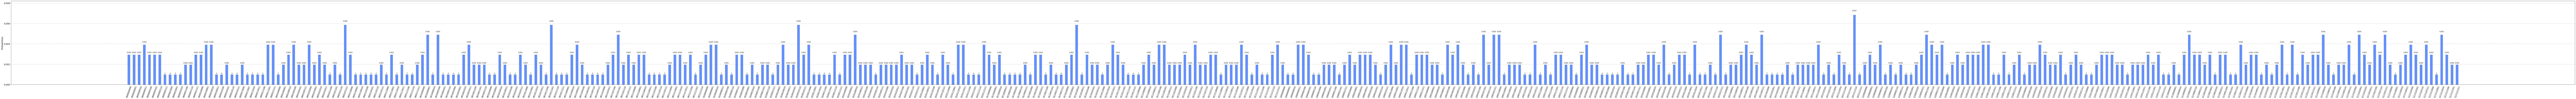

In [39]:
plot_histogram(result.get_counts(qft3),figsize=(300,10))

In [42]:
x = result.get_counts(qft3)

sorted_x={k:v for k, v in sorted(x.items(), key=lambda item: item[1], reverse=True)}
dict_items = sorted_x.items()
list(dict_items)[:3]

[('101111110', 7), ('001011101', 6), ('010010110', 6)]

In [43]:
print('New Features: ', int('110101100',2),int('001001000',2),int('100001101',2))


New Features:  428 72 269


In [ ]:
input_state(qft4, 4)
qft4.barrier()
qft(qft4, 4)
qft4.barrier()
for j in range(4):
    qft4.measure(j, j)

input_state(qft5, 5)
qft5.barrier()
qft(qft5, 5)
qft5.barrier()
for j in range(5):
    qft5.measure(j, j)

print(qft3)
print(qft4)
print(qft5)

print('Qasm simulator')
